In [2]:
## 이번 장에 필요한 패키지들을 먼저 불러들임

import pandas as pd
import numpy as np
import os                                ## chdir 함수 사용위해서
import matplotlib.pyplot as plt          ## 그림 그리기 위해서
from lifelines import KaplanMeierFitter  ## KM 추정량 계산 위해서

In [3]:
## 디렉토리 설정
os.chdir("/Users/skang-imacpro/Dropbox/Sangwook/Teaching/YS-Naver/Survival/Data")
pbc = pd.read_csv("pbc_comp.csv")  ## pbc 자료 불러들이기
pbc                                ## PBC 자료 출력

,id,futime,delta,treat,age,sex,asc,hepa,spider,edema,bili,chol,albumin,copper,phos,sgot,trig,plate,protime,histol
0,1,400,1,1,58.7652,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,56.4463,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,1,1,70.0726,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,1,1,54.7406,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,0,2,38.1054,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,61.1828,1,0,1,0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,0,2,58.2998,1,0,0,0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,0,1,62.3326,1,0,0,0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,0,1,37.9986,1,0,0,0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [7]:
## 처리군 (treat = 1) 에 대해 생존 함수의 KM 추정치 계산 

## PBC 자료 중 treat의 값이 1인 행들만 가져와 tre1로 지정
tre1 = pbc.query("treat==1")

## 처리군에 대한 KM 추정치 결과를 kmf_tre1에 저장하도록 지정
kmf_tre1 = KaplanMeierFitter() 

## tre1에 대해 KM 추정치 계산함
kmf_tre1.fit(tre1["futime"], tre1["delta"], label="tre1")

<lifelines.KaplanMeierFitter:"tre1", fitted with 158 total observations, 93 right-censored observations>

In [8]:
## tre1의 KM 추정 결과를 포함한 event table 산출: (removed, observed, censored 등)
kmf_tre1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,158,158
41.0,1,1,0,0,158
71.0,1,1,0,0,157
131.0,1,1,0,0,156
140.0,1,1,0,0,155
...,...,...,...,...,...
4365.0,1,0,1,0,5
4459.0,1,0,1,0,4
4467.0,1,0,1,0,3


In [9]:
## tre1의 생존 함수 추정치를 보여줌
kmf_tre1.survival_function_

,tre1
timeline,
0.0,1.000000
41.0,0.993671
71.0,0.987342
131.0,0.981013
140.0,0.974684
...,...
4365.0,0.318562
4459.0,0.318562
4467.0,0.318562


In [10]:
## tre1의 생존함수 추청치의 95% 신뢰구간을 보여줌
kmf_tre1.confidence_interval_survival_function_

,tre1_lower_0.95,tre1_upper_0.95
0.0,1.000000,1.000000
41.0,0.955927,0.999106
71.0,0.950339,0.996819
131.0,0.942293,0.993836
140.0,0.933958,0.990422
...,...,...
4365.0,0.173498,0.473744
4459.0,0.173498,0.473744
4467.0,0.173498,0.473744
4500.0,0.173498,0.473744


Text(0, 0.5, 'KM estimate of survival function')

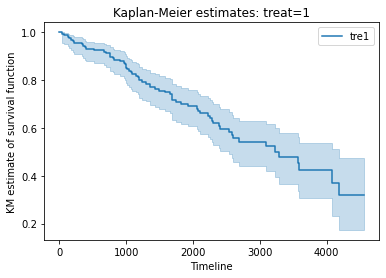

In [11]:
## 신뢰구간을 포함한 plot을 그림 
## ci_show 옵션으로 신뢰구간 포함 여부를 정함 (default는 True)
kmf_tre1.plot()
plt.title("Kaplan-Meier estimates: treat=1")    ## plot의 제목
plt.xlabel("Timeline")                          ## x축의 제목   
plt.ylabel("KM estimate of survival function")  ## y축의 제목 

Text(0, 0.5, 'KM estimate of survival function')

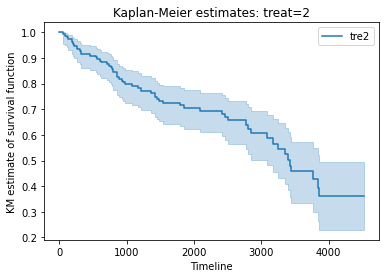

In [5]:
## 4장: 처리와 위약 집단의 생존 함수를 비교
## 로그-순위 검정법 사용

## 위약군에 대한 KM 추정치 계산 (treat==2)

## PBC 자료 중 treat의 값이 2인 행들만 가져와 tre2로 지정
tre2 = pbc.query("treat==2")
## 위약군에 대한 KM 추정치 결과를 kmf_tre2에 저장하도록 지정
kmf_tre2 = KaplanMeierFitter()
## tre2에 대해 KM 추정치 계산함
kmf_tre2.fit(tre2["futime"], tre2["delta"], label="tre2")

## 3장 연습 문제에 대한 답
kmf_tre2.event_table
kmf_tre2.survival_function_
kmf_tre2.confidence_interval_survival_function_

## 신뢰구간을 포함한 plot을 그림 
## ci_show 옵션으로 신뢰구간 포함 여부를 정함 (default는 True)
kmf_tre2.plot()
plt.title("Kaplan-Meier estimates: treat=2")    
plt.xlabel("Timeline")                          
plt.ylabel("KM estimate of survival function")

Text(0, 0.5, 'KM estimate of survival function')

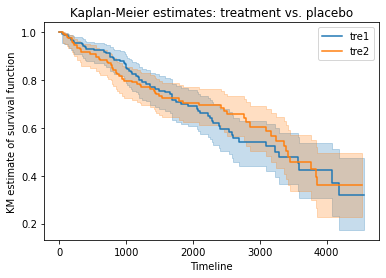

In [13]:
## 처리와 위약 집단의 KM 추정치를 하나의 plot 으로 그림
## 같이 그리기 위해 다른 함수를 사용할 필요 없이 그냥 연속으로 코드를 입력하면 됨 
kmf_tre1.plot()
kmf_tre2.plot()
plt.title("Kaplan-Meier estimates: treatment vs. placebo")    
plt.xlabel("Timeline")                          
plt.ylabel("KM estimate of survival function")

In [14]:
## 처리와 위약군을 비교하는 로그-순위 검정 실시

## lifelines 패키지에서 logrank_test 함수 호출
from lifelines.statistics import logrank_test  

tre1 = pbc.query("treat==1")  ## 처리군 자료 tre1로 저장
tre2 = pbc.query("treat==2")  ## 위약군 자료 tre1로 저장

## logrank_test 함수 사용 로그-순위 검정 실시
## 비교하고자 하는 그룹이 A, B라 할 때 
## logrank_test(그룹 A의 생존시간, 그룹 B의 생존시간, 그룹 A의 절단 여부, 그룹 B의 절단 여부)의 형식
results_tre = logrank_test(tre1["futime"], tre2["futime"], tre1["delta"], tre2["delta"])

In [15]:
## 로그-순위 검정의 결과 출력
results_tre.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.42

Text(0, 0.5, 'KM estimate of survival function')

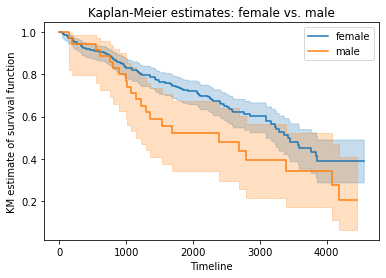

In [16]:
## 예제: 성별의 생존 함수를 비교하는 로그-순위 검정 실시

female = pbc.query("sex==1")  ## 여성 자료 female로 저장
male = pbc.query("sex==0")    ## 남성 자료 male로 저장

# 여성에 대한 KM 추정 결과 저장
kmf_female = KaplanMeierFitter()
kmf_female.fit(female["futime"], female["delta"], label="female")

# 남성에 대한 KM 추정 결과 저장
kmf_male = KaplanMeierFitter()
kmf_male.fit(male["futime"], male["delta"], label="male")

# 성별 KM 추정치 동시에 plot
kmf_female.plot()
kmf_male.plot()
plt.title("Kaplan-Meier estimates: female vs. male")    
plt.xlabel("Timeline")                          
plt.ylabel("KM estimate of survival function")

In [22]:
from lifelines.statistics import logrank_test
results_sex=logrank_test(female["futime"], male["futime"], female["delta"], male["delta"])
results_sex.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.27 0.04      4.69